In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('images.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_numpy = data.values
data_numpy

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

AxesImage(size=(28, 28))


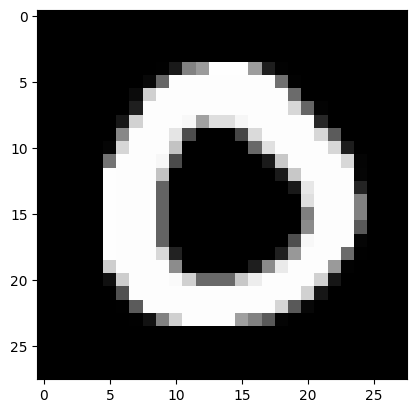

In [4]:
image_matrix = data_numpy[4, 1:].reshape(28, 28)
print(plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=255))

In [5]:
def print_image(image_flat, ax=None):
    image = image_flat.reshape(28, 28).astype('uint8')
    
    if ax is None:
        plt.imshow(image, cmap='gray')
    else:
        ax.imshow(image, cmap='gray')

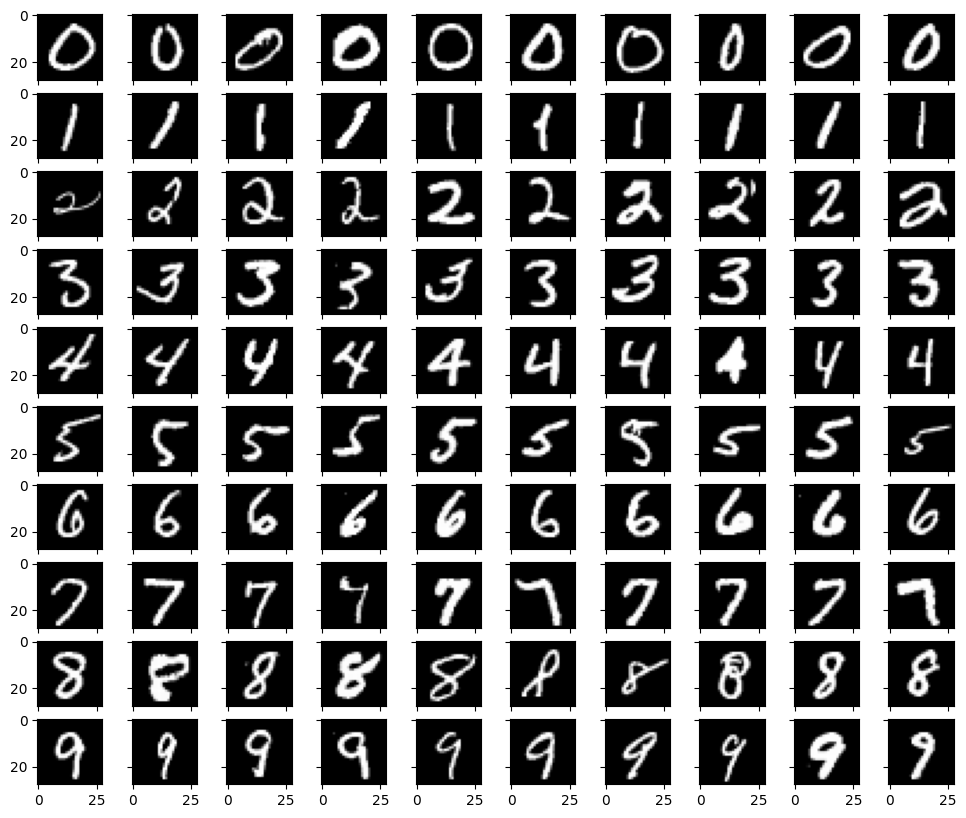

In [6]:
fig, axs = plt.subplots(10, 10, figsize=(12,10),
                       sharex=True, sharey=True)

group_n = 0
for _, group in data.groupby('label', as_index=False):
    random_numbers = group.sample(10).drop(columns='label')
    image_vects = [x.values for _, x in random_numbers.iterrows()]
    
    image_n = 0
    for image in image_vects:
        print_image(image, ax=axs[group_n][image_n])
        image_n += 1
        
    group_n += 1

In [7]:
data.groupby('label', as_index=False).agg({'pixel0': 'count'}).rename(columns={'pixel0':'count'})

,label,count
0,0,4132
1,1,4684
2,2,4177
3,3,4351
4,4,4072
5,5,3795
6,6,4137
7,7,4401
8,8,4063
9,9,4188


In [8]:
label = data['label']
data.drop('label', axis=1, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

In [10]:
description = X_train.describe()
description

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,31500.0,31500.0,31500.0,31500.0,31500.0,31500.0,31500.0,31500.0,31500.0,31500.0,...,31500.000000,31500.000000,31500.000000,31500.000000,31500.000000,31500.000000,31500.0,31500.0,31500.0,31500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219968,0.126571,0.064381,0.022857,0.022984,0.003810,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.494596,4.742107,3.473581,1.899851,2.187556,0.478349,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
description.loc['mean'].values.reshape(28, 28).round(2)

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e-02, 3.0000e-02, 4.0000e-02, 6.0000e-02,
        1.3000e-01, 1.8000e-01, 2.0000e-01, 2.1000e-01, 2.1000e-01,
        1.8000e-01, 1.6000e-01, 1.2000e-01, 8.0000e-02, 5.0000e-02,
        4.0000e-02, 2.0000e-02, 1.0000e-02, 1.0000e-02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-02,
        1.0000e-02, 6.0000e-02, 1.7000e-01, 3.0000e-01, 5.2000e-01,
        8.3000e-01, 1.3000e+00, 2.0000e+00, 2.7200e+00, 3.4400e+00,
        3.8000e+00, 3.7100

<Axes: >

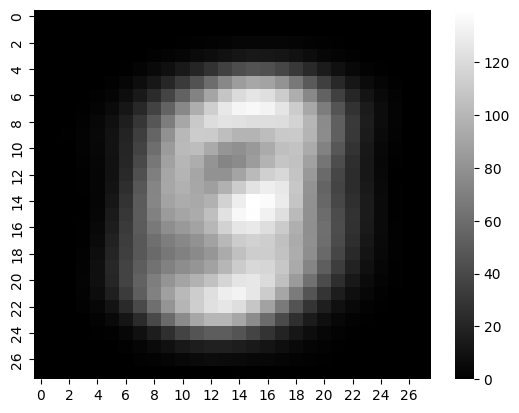

In [12]:
sns.heatmap(pd.DataFrame(description.loc['mean'].values.reshape(28, 28).round(2)), cmap='gray')

<Axes: >

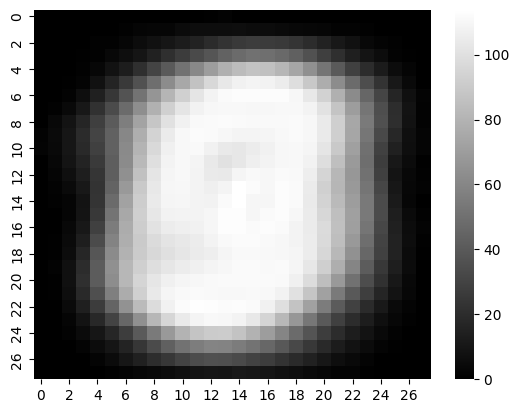

In [13]:
sns.heatmap(pd.DataFrame(description.loc['std'].values.reshape(28, 28).round(2)), cmap='gray')

In [14]:
selector = VarianceThreshold(threshold=0)
selector.fit(X_train)

VarianceThreshold(threshold=0)

In [15]:
len(X_train.columns)

784

In [16]:
len(selector.transform(X_train)[0])

694

In [17]:
X_train = X_train[selector.get_feature_names_out()]
X_train

,pixel12,pixel13,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [19]:
%%time

model_decision_tree = DecisionTreeClassifier(min_samples_leaf=4, criterion='gini', random_state=0)
model_decision_tree.fit(X_train, y_train)

CPU times: total: 7.61 s
Wall time: 7.79 s


DecisionTreeClassifier(min_samples_leaf=4, random_state=0)

In [20]:
model_decision_tree.score(X_train, y_train)

0.9467063492063492

In [21]:
model_decision_tree.score(X_val, y_val)

0.8507936507936508

In [22]:
%%time

model_random_forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4,
    max_features=int(len(list(X_train.columns)) ** (1/2)), criterion='gini', random_state=0)
model_random_forest.fit(X_train, y_train)

CPU times: total: 11.4 s
Wall time: 11.4 s


RandomForestClassifier(max_features=26, min_samples_leaf=4, n_estimators=50,
                       random_state=0)

In [23]:
model_random_forest.score(X_train, y_train)

0.9924206349206349

In [24]:
model_random_forest.score(X_val, y_val)

0.9542857142857143

In [25]:
y_pred = model_random_forest.predict(X_val)

In [26]:
precision_score(y_val, y_pred, average='micro')

0.9542857142857143

In [27]:
precision_score(y_val, y_pred, average='macro')

0.9542880825449582

In [28]:
accuracy_score(y_val, y_pred)

0.9542857142857143

In [29]:
X_err = X_val[y_pred != y_val]
X_err

,pixel12,pixel13,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
39309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Y_err = y_val[y_pred != y_val]
Y_err

39309    4
18076    4
23299    3
31852    3
4821     5
        ..
814      8
27217    9
33566    3
776      4
32568    4
Name: label, Length: 288, dtype: int64

In [31]:
Err = X_err.copy(deep=True)
Err['y'] = y_val.copy(deep=True)
Err['y_pred'] = y_pred[y_pred != y_val]
Err

,pixel12,pixel13,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,y,y_pred
39309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,6
18076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,8
23299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
31852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,7
4821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3
27217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,3
33566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2


In [32]:
len(Err)

288

In [36]:
X_test = X_test[selector.get_feature_names_out()]

In [38]:
%%time

model_random_forest.score(X_test, y_test)

CPU times: total: 234 ms
Wall time: 235 ms


0.9536190476190476

In [43]:
%%time

boot_accuracies = []
boot_precisions = []
boot_recalls = []

X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_test_boot = X_y_test.sample(len(X_y_test), replace=True)
    X_test_boot = X_y_test_boot.drop(columns='y')
    y_test_boot = X_y_test_boot['y']
    
    y_pred = model_random_forest.predict(X_test_boot)
    
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred, average='micro'))
    boot_recalls.append(recall_score(y_test_boot, y_pred, average='macro'))

CPU times: total: 5min 25s
Wall time: 5min 28s


<Axes: ylabel='Count'>

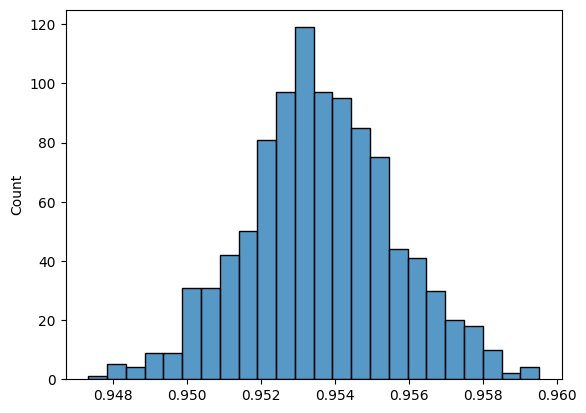

In [44]:
sns.histplot(boot_accuracies)

In [45]:
boot_accuracies_sorted = list(sorted(boot_accuracies))
boot_accuracies_sorted = boot_accuracies_sorted[25:975]

print('Доверительный интервал для accuracy:', 
      '(' + str(round(boot_accuracies_sorted[0], 3)) + ', ' + str(round(boot_accuracies_sorted[-1], 3)) + ')')

Доверительный интервал для accuracy: (0.95, 0.958)


In [46]:
boot_precisions_sorted = list(sorted(boot_precisions))
boot_precisions_sorted = boot_precisions_sorted[25:975]

print('Доверительный интервал для precision:', 
      '(' + str(round(boot_precisions_sorted[0], 3)) + ', ' + str(round(boot_precisions_sorted[-1], 3)) + ')')

Доверительный интервал для precision: (0.95, 0.958)


In [47]:
boot_recalls_sorted = list(sorted(boot_recalls))
boot_recalls_sorted = boot_recalls_sorted[25:975]

print('Доверительный интервал для recall:', 
      '(' + str(round(boot_recalls_sorted[0], 3)) + ', ' + str(round(boot_recalls_sorted[-1], 3)) + ')')

Доверительный интервал для recall: (0.949, 0.957)
